[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/sistema-massa-mola.ipynb)

In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt

## O problema

Temos um problema de dinâmica de corpo rigido com uma massa $m$ que é ligada a uma mola de constante $k$ que tem um amortecimento $c$. 
A equação é então regida por

$$
m\ddot{x} + c\dot{x} + kx = f
$$

Com as condições iniciais

* Posição inicial $x(t = 0) = x_0$
* Velocidade inicial $v(t = 0) = \dot{x}(t=0) = v_0$

## Solução analítica

Temos a equação dada por

$$
m \cdot \ddot{x} + c \cdot \dot{x} + k \cdot x = 0 
$$

A solução dessa EDO (Equação Diferencial Ordinária) é simples e envolve dizer que $x$ é na verdade uma exponencial complexa:

$$
x(t) = A \cdot \exp \left(st\right)  \ \ \ \ \ s \in \mathbb{C}
$$

De forma que obtemos a equação algébrica definida por

$$
\exp \left(st \right) \cdot A \left[ms^2 + cs + k\right] = 0
$$

Encontrando a solução dessa equação para $s$, conseguimos a EDO.
A solução é dada por

$$
s = \dfrac{-c\pm \sqrt{c^2-4mk}}{2m}
$$

Antes de analisar a solução, vamos primeiro reescrever a equação original por 

$$
\ddot{x} + 2\xi \omega \cdot \dot{x} + \omega^2 \cdot x = 0
$$

Em que

$$
\omega_n = \sqrt{\dfrac{k}{m}}
$$
$$
\xi = \dfrac{c}{2\sqrt{mk}}
$$

E para $0 < \xi < 1$, temos a frequência amortecida $\omega_d$.

$$
\omega_{d} = \omega_{n} \sqrt{1-\xi^2}
$$


Com esses dois parâmetros temos a solução

$$
s = \omega_n \left(-\xi \pm \sqrt{\xi^2 - 1}\right)
$$

E então dividimos a solução em 4 tipos diferentes:

* $\xi = 0$ (Vibração livre harmônica)

$$
x(t) = A_1 \cdot \cos \omega_n t + A_2 \cdot \sin \omega_n  t 
$$

* $0 < \xi < 1$ (Vibração livre subamortecida)

$$
x(t) =  \exp\left(-\xi \omega_n t\right) \left[ A_1 \cdot \cos \omega_d t + A_2 \cdot \sin \omega_d  t \right]
$$

* $\xi = 1$ (Vibração livre criticamente amortecida)

$$
x(t) = \exp \left(-\omega_n t\right) \cdot \left[A_1 + A_2 \cdot t\right]
$$

* $\xi > 1$ (Vibração livre super-amortecida)

$$
x(t) = A_1 \cdot \exp \left(-\omega_n t \cdot \left[\xi - \sqrt{\xi^2 - 1}\right]\right)+ A_2 \cdot \exp \left(-\omega_n t \cdot \left[\xi + \sqrt{\xi^2 - 1}\right]\right)
$$

#### Solução para Vibração livre harmônica ($\xi = 0$)

Neste caso teremos a solução geral

$$
x(t) = A_1 \cdot \cos \omega_n t + A_2 \cdot \sin \omega_n t
$$

Cuja velocidade $v(t)$ é dada por

$$
v(t) = \dot{x}(t) = - A_1 \omega_n \sin \omega_n t + A_2 \omega_n \cos \omega_n t
$$

Já os parâmetros $A_1$ e $A_2$ vem das condições iniciais. Seja $x(t=0) = x_0$ e $\dot{x}(0) = v_0$, teremos

$$
\begin{cases}
x(0) = x_0 \\
v(0) = v_0
\end{cases} \Rightarrow
\begin{cases}
A_1 \cdot \underbrace{\cos \omega_n \cdot 0}_{1} + A_2 \cdot \underbrace{\sin \omega_n \cdot 0}_{0} = x_0 \\
-\omega_n A_2 \cdot \underbrace{\sin \omega_n \cdot 0}_{0} + \omega_n A_2 \cdot \underbrace{\cos \omega_n \cdot 0}_{1} = v_0
\end{cases}
$$

Resultando então no sistema

$$
\begin{bmatrix}
1 & 0 \\
0 & \omega_n
\end{bmatrix} \cdot \begin{bmatrix}
A_{1} \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}  \Longrightarrow 
\begin{bmatrix}
A_1 \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ \frac{1}{\omega_n} v_0
\end{bmatrix}
$$

Ou seja, teremos a solução analítica dada por

$$
x(t) = x_0 \cdot \cos \omega_n t + \dfrac{v_0}{\omega_n} \cdot \sin \omega_n t
$$

$$
\dot{x}(t) = -x_0 \omega_n \cdot \cos \omega_n t + v_0 \cdot \cos \omega_n t
$$

In [2]:
def solucao_harmonica(wn:float, t, x0:float, v0:float):
    x = x0 * sp.cos(wn * t) + (v0/wn)* sp.sin(wn * t)
    return x

#### Solução sub-amortecida ($0 < \xi < 1$)

Neste caso temos a solução

$$
x(t) = \exp \left(-\xi \omega_n t\right) \cdot \left[A_1 \cdot \cos \omega_d t + A_2 \cdot \sin \omega_d t \right]
$$

Cuja velocidade

$$
v(t) = \dot{x}(t) = \exp \left(-\xi \omega_n t\right) \left[(-\xi \omega_n A_1 + \omega_d A_2)\cdot \cos \omega_d t  + (-\xi \omega_n A_2 - \omega_d A_1)\cdot \sin \omega_d t\right]
$$

Os parâmetros $A_1$ e $A_2$ vem das condições iniciais. Seja $x(t=0) = x_0$ e $\dot{x}(0) = v_0$, teremos

$$
\begin{cases}
x(0) = x_0 \\
v(0) = v_0
\end{cases} \Rightarrow
\begin{cases}
\underbrace{\exp \left(-\xi \omega_n \cdot 0\right)}_{1} \cdot \left[A_1 \cdot \underbrace{\cos \omega_d \cdot 0}_{1} + A_2 \cdot \underbrace{\sin \omega_d \cdot 0}_{0} \right] = x_0 \\
\underbrace{\exp \left(-\xi \omega_n \cdot 1\right)}_{1} \left[(-\xi \omega_n A_1 + \omega_d A_2)\cdot \underbrace{\cos \omega_d \cdot 0}_{1}  + (-\xi \omega_n A_2 - \omega_d A_1)\cdot \underbrace{\sin \omega_d t}_{0}\right] = v_0
\end{cases}
$$

Resultando então no sistema

$$
\begin{bmatrix}
1 & 0 \\
-\xi \omega_n & \omega_d
\end{bmatrix} \cdot \begin{bmatrix}
A_{1} \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}  \Longrightarrow 
\begin{bmatrix}
A_1 \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
\xi \frac{\omega_n}{\omega_d}& \frac{1}{\omega_d}
\end{bmatrix}
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

Ou seja, teremos a solução analítica dada por

$$
x(t) = \exp \left(-\xi \omega_n t\right) \cdot \left[x_0 \cdot \cos \omega_d t + \left(\xi \ \dfrac{\omega_n}{\omega_d} \cdot x_0 + \dfrac{1}{\omega_d} \cdot v_0 \right) \cdot \sin \omega_d t \right]
$$

$$
\dot{x}(t) = \exp \left(-\xi \omega_n t\right) \left[ v_0 \cdot \cos \omega_d t  - \left(\left(\omega_d + \xi^2 \dfrac{\omega_{n}^2}{\omega_d}\right) \cdot x_0 + \xi \dfrac{\omega_n}{\omega_d} \cdot v_0 \right)\cdot \sin \omega_d t\right]
$$

In [3]:
def solucao_sub_amortecida(xi:float, wn:float, t, x0:float, v0:float):
    wd = wn * np.sqrt(1-xi**2)
    x = sp.exp(-xi*wn*t) * (x0 * sp.cos(wd*t) + (xi*wn*x0/wd + v0/wd) * sp.sin(wd*t))
    return x

#### Solução para Vibração livre criticamente amortecida ($\xi = 1$)

Neste caso temos a solução

$$
x(t) = \exp \left(-\omega_n t\right) \cdot \left[A_1 + A_2 t\right]
$$

Cuja velocidade

$$
v(t) = \dot{x}(t) = \exp \left(-\omega_n t\right)\left[-\omega_n A_1 - \omega_n A_2 t + A_2 \right]
$$

Os parâmetros $A_1$ e $A_2$ vem das condições iniciais. Seja $x(t=0) = x_0$ e $\dot{x}(0) = v_0$, teremos

$$
\begin{cases}
x(0) = x_0 \\
v(0) = v_0
\end{cases} \Rightarrow
\begin{cases}
A_1 + A_2 \cdot 0 = x_0 \\
-\omega_n A_1 - \omega_n \cdot A_2 \cdot 0 +  A_2  = v_0 \\
\end{cases}
$$

Resultando então no sistema

$$
\begin{bmatrix}
1 & 0 \\
-\omega_n & 1
\end{bmatrix} \cdot \begin{bmatrix}
A_{1} \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}  \Longrightarrow 
\begin{bmatrix}
A_1 \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
\omega_n & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

Ou seja, teremos a solução analítica dada por

$$
x(t) = \exp \left(-\omega_n t\right) \cdot \left[x_0\cdot \left(1 + \omega_n t\right) + v_0 \cdot t \right]
$$

$$
\dot{x}(t) = \exp \left(- \omega_n t\right) \left[ x_0 \cdot \omega_n^2 t + v_0 \right]
$$

In [4]:
def solucao_criticamente_amortecida(wn:float, t, x0:float, v0:float):
    x = sp.exp(-wn*t) * (x0 * (1+wn*t) + v0 * t)
    return x

#### Solução para Vibração livre super-amortecida ($1 < \xi$)

Para faciilitar a notação, diremos

$$
\mu = \sqrt{\xi^2 - 1}
$$

$$
\alpha = \xi - \mu
$$
$$
\beta = \xi + \mu
$$

Neste caso temos a solução

$$
x(t) = A_1 \cdot \exp \left(-\alpha \omega_n t  \right)+ A_2 \cdot \exp \left(-\beta \omega_n t \right)
$$

Cuja velocidade

$$
v(t) = \dot{x}(t) = -\alpha \omega_n \cdot A_1 \exp \left(- \alpha \omega_n t\right) - \beta \omega_n  \cdot A_2 \exp \left(-\beta \omega_n t\right) 
$$

Os parâmetros $A_1$ e $A_2$ vem das condições iniciais. Seja $x(t=0) = x_0$ e $\dot{x}(0) = v_0$, teremos

$$
\begin{cases}
x(0) = x_0 \\
v(0) = v_0
\end{cases} \Rightarrow
\begin{cases}
A_1 + A_2  = x_0 \\
-\alpha \omega_n \cdot A_1  -\beta \omega_n \cdot A_2  = v_0
\end{cases}
$$

Resultando então no sistema

$$
\begin{bmatrix}
1 & 1 \\
- \alpha \omega_n & -\beta \omega_n
\end{bmatrix} \cdot \begin{bmatrix}
A_{1} \\ A_2
\end{bmatrix} = 
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$
$$
\begin{bmatrix}
A_1 \\ A_2
\end{bmatrix} = 
\dfrac{1}{2 \mu \omega_n}
\begin{bmatrix}
\beta \omega_n & 1 \\
-\alpha \omega_n & -1
\end{bmatrix}
\begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

Temos a solução então

$$
x(t) = \dfrac{1}{2\mu}\left(\beta x_0 + \dfrac{v_0}{\omega_n}\right) \cdot \exp \left(-\alpha \omega_n t\right) - \dfrac{1}{2\mu}\left(\alpha x_0 + \dfrac{v_0}{\omega_n}\right) \cdot \exp \left(-\beta \omega_n t\right)
$$

$$
\dot{x}(t) = \dfrac{-\alpha}{2\mu}\left(\beta \omega_n x_0 + v_0\right) \cdot \exp \left(-\alpha \omega_n t\right) + \dfrac{\beta}{2\mu}\left(\alpha \omega_n x_0 + v_0 \right) \cdot \exp \left(-\beta \omega_n t\right)
$$



In [5]:
def solucao_super_amortecida(xi:float, wn:float, t, x0:float, v0:float):
    mu = np.sqrt(xi**2 - 1)
    alpha = xi - mu
    beta = xi + mu
    x = (beta*x0 + v0/wn)*sp.exp(-alpha*wn*t)/(2*mu)
    x -= (alpha*x0 + v0/wn)*sp.exp(-beta*wn*t)/(2*mu)
    return x

#### Exemplo com diferentes configurações de $\xi$

Primeiro criamos a função para receber a solução para qualquer $\xi$

In [6]:
def solucao_x(xi:float, wn:float, x0:float, v0:float):
    t = sp.symbols("t")
    if xi == 0:
        x = solucao_harmonica(wn, t, x0, v0)
    if 0 < xi < 1:
        x = solucao_sub_amortecida(xi, wn, t, x0, v0)
    if xi == 1:
        x = solucao_criticamente_amortecida(wn, t, x0, v0)
    if xi > 1:
        x = solucao_super_amortecida(xi, wn, t, x0, v0)
    return sp.lambdify(t, x)

def solucao_v(xi:float, wn:float, x0:float, v0:float):
    t = sp.symbols("t")
    if xi == 0:
        x = solucao_harmonica(wn, t, x0, v0)
    if 0 < xi < 1:
        x = solucao_sub_amortecida(xi, wn, t, x0, v0)
    if xi == 1:
        x = solucao_criticamente_amortecida(wn, t, x0, v0)
    if xi > 1:
        x = solucao_super_amortecida(xi, wn, t, x0, v0)
    v = sp.diff(x, t)
    return sp.lambdify(t, v)

Agora plotamos alguns gráficos para alguns $\xi$

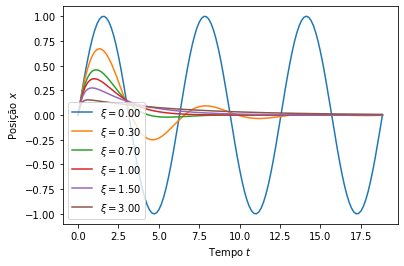

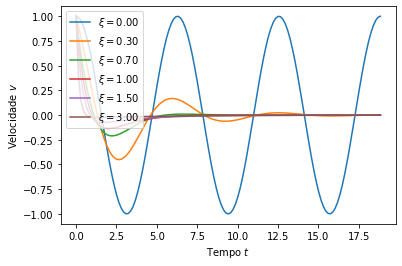

In [7]:
def show_example(xis, wn, u0, v0, nper):
    T = nper * (2*np.pi/wn)
    tplot = np.linspace(0, T, 129)

    plt.figure()
    for xi in xis:
        x_ana_func = solucao_x(xi, wn, u0, v0)
        xplot = [x_ana_func(ti) for ti in tplot]
        plt.plot(tplot, xplot, label=r"$\xi = %.2f$"%xi)
    plt.xlabel(r"Tempo $t$")
    plt.ylabel(r"Posição $x$")
    plt.legend()

    plt.figure()
    for xi in xis:
        v_ana_func = solucao_v(xi, wn, u0, v0)
        vplot = [v_ana_func(ti) for ti in tplot]
        plt.plot(tplot, vplot, label=r"$\xi = %.2f$"%xi)
    plt.xlabel(r"Tempo $t$")
    plt.ylabel(r"Velocidade $v$")
    plt.legend()

show_example(xis=[0, 0.3, 0.7, 1, 1.5, 3], wn=1, u0=0, v0=1, nper=3)

## Solução numérica

Existem diversas formas de se resolver numericamente esse problema.
Aqui iremos abordar 3 meios e então comparar com a solução analítica.

Primeiro vamos colocar as condições iniciais

#### Mostrando a solução analítica

Para os dados fornecidos teremos os gráficos abaixo da posição e velocidade

In [8]:
m = 50  # Massa (kg)
c = 2  # Constante de amortecimento (N*s/m)
k = 10  # Constante da mola (N/m)
x0 = 1  # Posicao inicial (m)
v0 = 1  # Velocidade inicial (m/s)

T = 180  # Tempo total
npts = 1000  # Numero de pontos no tempo

In [9]:
wn = np.sqrt(k/m)
xi = c/(2*np.sqrt(k*m))
print("Frequencia natural: wn = %.3f rad/s" % wn)
print("Constante amorteci: xi = %.3f " % xi)
if xi < 1:
    wd = wn * np.sqrt(1-xi**2)
    Tp = 2 * np.pi/wd
if 0 < xi < 1:
    print("Frequencia amortec: wd = %.3f rad/s" % wd)
if xi < 1:
    print("Período de uma oscilacao: Tp = %.3f s" % Tp)

Frequencia natural: wn = 0.447 rad/s
Constante amorteci: xi = 0.045 
Frequencia amortec: wd = 0.447 rad/s
Período de uma oscilacao: Tp = 14.064 s


Text(0.5, 1.0, 'Solução analítica da EDO mostrada: Velocidade')

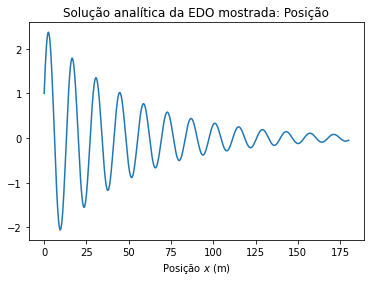

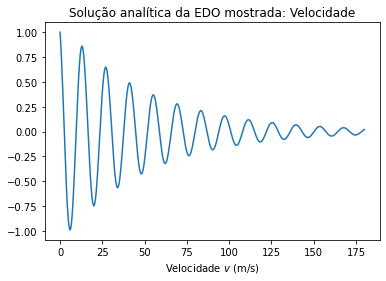

In [10]:
t = np.linspace(0, T, npts)

x_ana = solucao_x(xi, wn, x0, v0)(t)
plt.figure()
plt.plot(t, x_ana)
plt.xlabel(r"Tempo $t$ (s)")
plt.xlabel(r"Posição $x$ (m)")
plt.title(r"Solução analítica da EDO mostrada: Posição")

v_ana = solucao_v(xi, wn, x0, v0)(t)
plt.figure()
plt.plot(t, v_ana)
plt.xlabel(r"Tempo $t$ (s)")
plt.xlabel(r"Velocidade $v$ (m/s)")
plt.title(r"Solução analítica da EDO mostrada: Velocidade")

Pra comparar as soluções numéricas com a solução analítica calcularemos a norma do erro.
A forma geral de uma norma é dada por

$$
\| \vec{x}\|_{p} = \left( \sum_{i} |x_{i}|^{p} \right)^{1/p}
$$

No caso usaremos 3 normas que são

* Norma $L_1$: quando $p=1$

$$
\| \vec{x}\|_{1} = \sum_{i} |x_{i}|
$$

* Norma $L_2$: quando $p=2$

$$
\| \vec{x}\|_{2} = \sqrt{ \sum_{i} x_{i}^2}
$$

* Norma $L_{\infty}$: quando $p \to \infty$

$$
\| \vec{x}\|_{\infty} = \max_{i} |x_{i}|
$$





In [11]:
def norma_L1(x):
    return np.sum(np.abs(x))

def norma_L2(x):
    return np.sqrt(np.sum(x**2))

def norma_inf(x):
    return np.max(np.abs(x))

#### Solução Numérica 1

Queremos encontrar uma equação como

$$
\dot{y} = A \cdot y + B
$$

De modo geral, vamos resolver para o sistema

$$
m \cdot  \ddot{x} + c \cdot \dot{x} + k \cdot x = f(t, \ x, \ \dot{x})
$$


Podemos adicionar mais uma equação identidade que é dada por

$$
\dot{x} = \dot{x}
$$

Reescrevemos a primeira equação usando um parãmetro $\alpha \in \left[0, \ 1\right]$ de forma que

$$
m \cdot \ddot{x} + \alpha \cdot c \cdot \dot{x} = -(1-\alpha) \cdot c \cdot \dot{x} - k \cdot x + f(t, \ x, \ \dot{x})  
$$

De modo que podemos montar o sistema

$$
\begin{bmatrix}
1 & 0 \\
\alpha c & m
\end{bmatrix} \cdot 
\begin{bmatrix}
\dot{x} \\
\ddot{x}
\end{bmatrix} = 
\begin{bmatrix}
0 & 1 \\
-k & (\alpha - 1)c
\end{bmatrix}
\cdot \begin{bmatrix}
x  \\ \dot{x}
\end{bmatrix} + 
\begin{bmatrix}
0 \\ f(t, \ x, \ \dot{x})
\end{bmatrix}
$$

Invertendo a matriz obtemos a equação

$$
\begin{bmatrix}
\dot{x} \\ \ddot{x}
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\
\alpha c & m
\end{bmatrix}^{-1} 
\begin{bmatrix}
0 & 1 \\
-k & (\alpha - 1)c
\end{bmatrix} \cdot 
\begin{bmatrix}
x \\ \dot{x}
\end{bmatrix} + 
\begin{bmatrix}
1 & 0 \\
\alpha c & m
\end{bmatrix}^{-1}
\begin{bmatrix}
0 \\ f(t, \ x, \ \dot{x})
\end{bmatrix}
$$

Como uma matrix $2 \times 2$ é facil de encontrar a inversa teremos

$$
\begin{bmatrix}
\dot{x} \\ \ddot{x}
\end{bmatrix} = 
\underbrace{
\begin{bmatrix}
0 & 1 \\
\frac{-k}{m} & \frac{-c}{m}
\end{bmatrix}}_{\left[A\right]} \cdot
\begin{bmatrix}
x \\ \dot{x}
\end{bmatrix} + 
\underbrace{
\begin{bmatrix}
0 \\ \frac{1}{m}f(t, \ x, \ \dot{x})
\end{bmatrix}}_{\left[B\right]}
$$

Vemos que o parâmetro $\alpha$ não influencia nas matrizes $A$ e $B$.

In [12]:
A = np.array([[0, 1],
              [-k/m, -c/m]])
B = np.zeros(2)  # Pois é oscilação livre, f = 0

O primeiro método consiste em utilizar um método ```odeint``` já implementado na biblioteca ```scipy.integrate```.

Teremos então  a função 

$$
\dfrac{dy}{dt} = \dot{y} =
\begin{bmatrix}
\dot{x} \\ \ddot{x}
\end{bmatrix} = 
\left[A\right]\cdot \begin{bmatrix}
x \\ \dot{x}
\end{bmatrix} = \left[A\right] \cdot y
$$

In [13]:
def dydt(y, t):
    return A @ y

Com a condição inicial

$$
y_0 = \begin{bmatrix}
x_0 \\ v_0
\end{bmatrix}
$$

In [14]:
y0 = [x0, v0]

Resolvemos então usando a função ```odeint```

In [15]:
t = np.linspace(0, T, npts)
Y_num1 = odeint(dydt, y0, t)

O resultado fornecido é $Y$ em que

$$
Y = \begin{bmatrix}
x_{0} & v_{0} \\
x_{1} & v_{1} \\ 
\vdots & \vdots \\
x_{n-1} & v_{n-1}
\end{bmatrix}
$$

Em que é uma aproximação do valor correto, isto é

$$
x_i \approx x(t_i)
$$
$$
v_{i} \approx v(t_i)
$$

Agora mostramos os resultados:

* Para a posição

Error x_num1 norm L1  = 1.837e-04
Error x_num1 norm L2  = 6.642e-06
Error x_num1 norm inf = 4.438e-07


Text(0.5, 1.0, 'Posição do sistema ao longo do tempo')

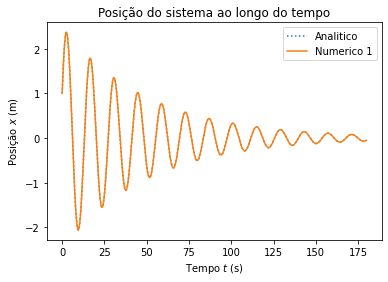

In [16]:
x_num1 = Y_num1[:, 0]
print("Error x_num1 norm L1  = %.3e" % norma_L1(x_num1 - x_ana))
print("Error x_num1 norm L2  = %.3e" % norma_L2(x_num1 - x_ana))
print("Error x_num1 norm inf = %.3e" % norma_inf(x_num1 - x_ana))
plt.plot(t, x_ana, label="Analitico", ls="dotted")
plt.plot(t, x_num1, label="Numerico 1")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Posição $x$ (m)")
plt.title("Posição do sistema ao longo do tempo")

* Para a velocidade

Error v_num1 norm L1  = 8.108e-05
Error v_num1 norm L2  = 2.938e-06
Error v_num1 norm inf = 2.029e-07


Text(0.5, 1.0, 'Velocidade do sistema ao longo do tempo')

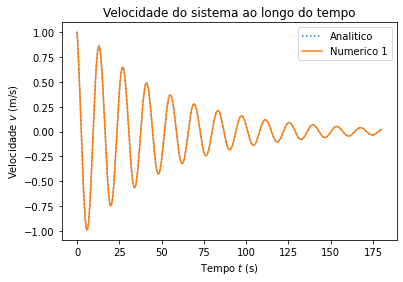

In [17]:
v_num1 = Y_num1[:, 1]
print("Error v_num1 norm L1  = %.3e" % norma_L1(v_num1 - v_ana))
print("Error v_num1 norm L2  = %.3e" % norma_L2(v_num1 - v_ana))
print("Error v_num1 norm inf = %.3e" % norma_inf(v_num1 - v_ana))
plt.plot(t, v_ana, label="Analitico", ls="dotted")
plt.plot(t, v_num1, label="Numerico 1")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Velocidade do sistema ao longo do tempo")

#### Solução numérica 2

Para essa solução, utilizamos a mesma formulação obtida acima

$$
\dot{y} = A \cdot y
$$

Caso $y$ fosse escalar, teríamos a solução dessa equação como

$$
y = y_0 \cdot \exp \left(At\right)
$$

Com $y_0$ a condição inicial.

Contudo, como $y$ é um vetor e $A$ é uma matriz, então poderiamos supor a solução como

$$
\left[y\right] = \exp \left(\left[A\right] \cdot t\right) \cdot \left[y_0\right]
$$

Nesse sentido, teríamos que definir o exponencial de uma matriz, e essa forma é obtida por expansão em séries de Taylor, isto é

$$
\exp \left(\left[M\right]\right) = \left[I\right] + \dfrac{1}{1!}\left[M\right] + \dfrac{1}{2!}\left[M\right]^2 + \dfrac{1}{3!}\left[M\right]^3 + \cdots
$$

Em que temos multiplicação de matrizes diversas vezes. Computacionamente isso é custoso e então fazemos a decomposição utilizando os auto-valores e auto-vetores.

$$
\left[M\right] = \left[P\right] \cdot \left[\lambda \right] \cdot \left[P\right]^{-1}
$$

O que implica que

$$
\left[M\right]^{n} = \left[P\right] \cdot \left[\lambda \right]^{n} \cdot \left[P\right]^{-1}
$$

E então a soma se torna

$$
\exp \left(\left[M\right]\right) = \sum_{n=0}^{\infty} \dfrac{1}{n!}\left[M\right]^{n} = \sum_{n=0}^{\infty} \dfrac{1}{n!} \left[P\right] \cdot \left[\lambda \right]^{n} \cdot \left[P\right]^{-1}
$$

$$
\exp \left(\left[M\right]\right) = \left[P\right] \left(\sum_{n=0}^{\infty} \dfrac{1}{n!} \left[\lambda^{n}\right]\right) \left[P\right]^{-1} = \left[P\right] \left[\sum_{n=0}^{\infty} \dfrac{1}{n!} \lambda^{n}\right] \left[P\right]^{-1} 
$$

$$
\exp \left(\left[M\right]\right) = \left[P\right] \cdot \left[\exp \left(\lambda\right) \right] \cdot \left[P\right]^{-1}
$$

No caso, a matriz $\left[M\right]$ é a matriz $\left[A\right] \cdot t$.
Sendo $\lambda_{1}$ e $\lambda_2$ os autovalores de $\left[A\right]$, os auto-valores de $\left[M\right]$ são $(t \cdot \lambda_1)$ e $(t\cdot \lambda_2)$ de forma que

$$
\exp \left(t \left[A\right]\right) = \left[P\right] \cdot \begin{bmatrix} \exp(t\lambda_1) & \\ & \exp(t\lambda_2) \end{bmatrix} \cdot \left[P\right]^{-1}
$$

E portando a solução geral é

$$
\left[y\right] = \left[P\right] \cdot \begin{bmatrix} \exp(t\lambda_1) & \\ & \exp(t\lambda_2) \end{bmatrix} \cdot \left[P\right]^{-1} \cdot \left[y_0\right]
$$

Como sabemos, os auto-valores de $\left[A\right]$ são dados por

$$
\det \left(\left[A\right] - \lambda \left[I\right]\right) = \det \left(\begin{bmatrix} -\lambda & 1 \\ -\frac{k}{m} & -\frac{c}{m} - \lambda \end{bmatrix}\right) = \lambda \left(\lambda + \frac{c}{m}\right) + \frac{k}{m}= 0
$$

A solução dessa equação é

$$
\lambda = \dfrac{-c}{2m} \pm \sqrt{\dfrac{c^2}{m^2} - \dfrac{4k}{m}}
$$

Em termos de $\xi$ e $\omega_n$ é

$$
\lambda = \omega_n\left(-\xi \pm \sqrt{\xi^2 - 1}\right)
$$

In [18]:
A = np.array([[0, 1],
              [-k/m, -c/m]])
lams, P = np.linalg.eig(A)
print("Auto valores: ")
for i, lam in enumerate(lams):
    print("lambda%d = %s" % (i, str(lam)))
print("Auto vetores:")
for i in range(len(lams)):
    vi = P[:, i]
    print("v%d = %s" % (i, vi))
Pinv = np.linalg.inv(P)

Auto valores: 
lambda0 = (-0.01999999999999999+0.44676615807377346j)
lambda1 = (-0.01999999999999999-0.44676615807377346j)
Auto vetores:
v0 = [ 0.91287093+0.j         -0.01825742+0.40783984j]
v1 = [ 0.91287093-0.j         -0.01825742-0.40783984j]


Agora achamos a solução:

In [19]:
Y_num2 = np.zeros((npts, 2))
for i in range(npts):
    Matrix = P @ np.diag(np.exp(t[i] * lams)) @ Pinv
    Y_num2[i] = np.real(Matrix) @ y0 

Error x_num2 norm L1  = 1.075e-11
Error x_num2 norm L2  = 4.054e-13
Error x_num2 norm inf = 2.741e-14


Text(0.5, 1.0, 'Posição do sistema ao longo do tempo')

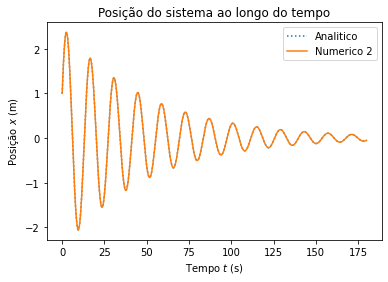

In [20]:
x_num2 = Y_num2[:, 0]
print("Error x_num2 norm L1  = %.3e" % norma_L1(x_num2 - x_ana))
print("Error x_num2 norm L2  = %.3e" % norma_L2(x_num2 - x_ana))
print("Error x_num2 norm inf = %.3e" % norma_inf(x_num2 - x_ana))
plt.plot(t, x_ana, label="Analitico", ls="dotted")
plt.plot(t, x_num2, label="Numerico 2")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Posição $x$ (m)")
plt.title("Posição do sistema ao longo do tempo")

Error v_num2 norm L1  = 4.872e-12
Error v_num2 norm L2  = 1.831e-13
Error v_num2 norm inf = 1.238e-14


Text(0.5, 1.0, 'Velocidade do sistema ao longo do tempo')

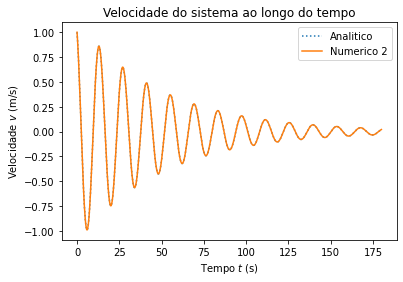

In [21]:
v_num2 = Y_num2[:, 1]
print("Error v_num2 norm L1  = %.3e" % norma_L1(v_num2 - v_ana))
print("Error v_num2 norm L2  = %.3e" % norma_L2(v_num2 - v_ana))
print("Error v_num2 norm inf = %.3e" % norma_inf(v_num2 - v_ana))
plt.plot(t, v_ana, label="Analitico", ls="dotted")
plt.plot(t, v_num2, label="Numerico 2")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Velocidade do sistema ao longo do tempo")

#### Solução numérica 3

Para a terceira solução, pegamos as **Diferenças Finitas Generalizadas**.

Sejam $\alpha$, $\beta$ e $\gamma$ parâmetros no intervalo $\left[0, \ 1 \right] \subset \mathbb{R}$, tais que

$$
v_{i+\alpha} = (1-\alpha) \cdot v_{i} + \alpha \cdot v_{i+1}
$$

$$
a_{i+\beta} = (1-\beta) \cdot a_{i} + \beta \cdot a_{i+1}
$$

$$
a_{i+\gamma} = (1-\gamma) \cdot a_{i} + \gamma \cdot a_{i+1}
$$

Então definimos o próximo passo $(x_{i+1}, \ v_{i+1})$ utilizando:

$$
x_{i+1} = x_{i} + \Delta t \cdot v_{i+\alpha} + \dfrac{1}{2}\Delta t ^2 \cdot a_{i+\beta} 
$$

$$
v_{i+1} = v_{i} + \Delta t \cdot a_{i+\gamma}
$$

Como o termo da força é nulo, podemos montar apenas

$$
a_{i} + \dfrac{c}{m} v_{i} + \dfrac{k}{m} x_{i} = 0
$$

$$
a_{i+1} + \dfrac{c}{m} v_{i+1} + \dfrac{k}{m} x_{i+1} = 0
$$

A equação da posição

$$
x_{i+1} - \alpha \Delta t v_{i+1} - \dfrac{1}{2} \beta \Delta t^2 a_{i+1} = x_{i} + \Delta t \left(1-\alpha\right) v_i + \dfrac{1}{2}(1-\beta)\Delta t^2 a_{i}
$$
$$
x_{i+1} - \alpha \Delta t \cdot v_{i+1} + \dfrac{1}{2}\beta \Delta t^2 \left(\dfrac{k}{m}x_{i+1} + \dfrac{c}{m}v_{i+1}\right) = x_{i} + \Delta t(1-\alpha) v_{i} - \dfrac{1}{2}(1-\beta) \Delta t^2 \left(\dfrac{k}{m}x_{i} + \dfrac{c}{m}v_{i}\right)
$$

$$
\begin{bmatrix}
1 + \dfrac{\beta k \Delta t^2}{2m} & -\alpha \Delta t + \dfrac{\beta c \Delta t^2}{2m}
\end{bmatrix} \begin{bmatrix}
x_{i+1} \\ v_{i+1} \end{bmatrix} = \begin{bmatrix}
1 - \dfrac{(1-\beta) k \Delta t^2}{2m} & (1-\alpha) \Delta t - \dfrac{(1-\beta) c \Delta t^2}{2m}
\end{bmatrix} \begin{bmatrix}
x_{i} \\ v_{i} \end{bmatrix} 
$$

E a equação da velocidade

$$
v_{i+1} - \gamma  \Delta t a_{i+1} = v_{i} + (1-\gamma) \Delta t a_{i} 
$$
$$
v_{i+1} + \gamma \Delta t \left(\dfrac{k}{m}x_{i+1} + \dfrac{c}{m} v_{i+1}\right) = v_{i} - (1-\gamma) \Delta t \left(\dfrac{k}{m}x_{i} + \dfrac{c}{m} v_{i}\right)
$$

$$
\begin{bmatrix}
\dfrac{\gamma k \Delta t}{m} & 1 + \dfrac{\gamma c \Delta t}{m} 
\end{bmatrix} \begin{bmatrix}
x_{i+1} \\ v_{i+1}
\end{bmatrix} = 
\begin{bmatrix}
\dfrac{-(1-\gamma) k \Delta t}{m} & 1 - \dfrac{(1-\gamma) c \Delta t}{m} 
\end{bmatrix} \begin{bmatrix}
x_{i} \\ v_{i}
\end{bmatrix}
$$

Então com as duas equações de forma matricial podemos montar


$$
\left[M_{1}\right] \begin{bmatrix}
x_{i+1} \\ v_{i+1}\end{bmatrix} = 
\left[M_{0}\right] \begin{bmatrix}
x_{i} \\ v_{i}\end{bmatrix}
$$

Em que

$$
\left[M_{0}\right] = \begin{bmatrix}
1 - \frac{1}{2}(1-\beta)\frac{k}{m} \Delta t^2 & (1-\alpha) \Delta t - \frac{1}{2}(1-\beta) \frac{c}{m}\Delta t^2 \\
- (1-\gamma) \frac{k}{m} \Delta t & 1 - (1-\gamma)\frac{c}{m}\Delta t
\end{bmatrix}
$$

$$
\left[M_{1}\right] = 
\begin{bmatrix}
1 + \frac{1}{2}\beta \frac{k}{m} \Delta t^2 & -\alpha \Delta t + \frac{1}{2}\beta \frac{c}{m} \Delta t^2 \\
\gamma \frac{k}{m} \Delta t & 1 + \gamma \frac{c}{m} \Delta t
\end{bmatrix}
$$

In [22]:
def getM0(m, c, k, dt, alpha, beta, gamma):
    km = k/m
    cm = c/m
    M0 = np.copy(np.eye(2))
    M0[0, 0] -= (1-beta)*km*(dt**2)/2
    M0[0, 1] += (1-alpha)*dt
    M0[0, 1] -= (1-beta)*cm*(dt**2)/2
    M0[1, 0] -= (1-gamma)*km*dt
    M0[1, 1] -= (1-gamma)*cm*dt
    return M0

def getM1(m, c, k, dt, alpha, beta, gamma):
    km = k/m
    cm = c/m
    M1 = np.copy(np.eye(2))
    M1[0, 0] += beta*km*(dt**2)/2
    M1[0, 1] -= alpha*dt 
    M1[0, 1] += beta*cm*(dt**2)/2
    M1[1, 0] += gamma*km*dt
    M1[1, 1] += gamma*cm*dt
    return M1

Caso $\Delta t$ seja sempre constante, é necessário calcular $M_0$ e $M_1$ apenas uma vez, de forma que fica eficiente calcular a matriz de iteração $W$:

$$
\begin{bmatrix}
x_{i+1} \\ v_{i+1}
\end{bmatrix} = 
\underbrace{\left(\left[M_1\right]^{-1} \cdot \left[M_0\right]\right) }_{\left[W\right]}
\begin{bmatrix}
x_{i} \\ v_{i}
\end{bmatrix}
$$

Os melhores valores de $\alpha$, $\beta$ e $\gamma$ depende dos valores dos valores de $\xi$ e $\omega_{n}$. Contudo, de forma geral colocamos

$$
\alpha = 0
$$
$$
\beta = \begin{cases}
\frac{1}{6} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{se} \ \xi < 0.2 \\
\frac{55}{84} \xi + \frac{1}{28}  \ \ \ \ \ \ \text{se} \ \ 0.2 < \xi < 0.6\\
\frac{3}{7} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \text{se} \ 0.6 < \xi
\end{cases}
$$
$$
\gamma = 0.5
$$

In [23]:
def getW(m, c, k, dt, alpha = None, beta = None, gamma = None):
    if alpha is None:
        alpha = 0.0
    if beta is None:
        if xi < 0.2:
            beta = 1/6
        elif xi < 0.6:
            beta = (1/28) + (55*xi/84)
        else:
            beta = 3/7
    if gamma is None:
        gamma = 0.5
    M0 = getM0(m, c, k, dt, alpha, beta, gamma)
    M1 = getM1(m, c, k, dt, alpha, beta, gamma)
    return np.linalg.inv(M1) @ M0

In [24]:
dt = t[1]-t[0]
W = getW(m, c, k, dt)

E então resolvemos

In [25]:
Y_num3 = np.zeros((npts, 2))
Y_num3[0] = [x0, v0]
for i in range(1, npts):
    Y_num3[i] = W @ Y_num3[i-1]

Error x_num3 norm L1  = 3.896e-01
Error x_num3 norm L2  = 1.544e-02
Error x_num3 norm inf = 1.123e-03


Text(0.5, 1.0, 'Posição do sistema ao longo do tempo')

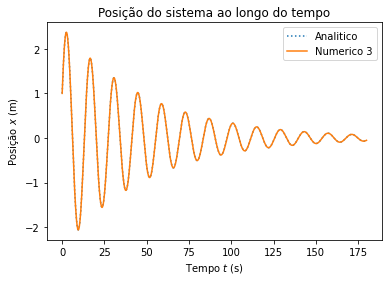

In [26]:
x_num3 = Y_num3[:, 0]
print("Error x_num3 norm L1  = %.3e" % norma_L1(x_num3 - x_ana))
print("Error x_num3 norm L2  = %.3e" % norma_L2(x_num3 - x_ana))
print("Error x_num3 norm inf = %.3e" % norma_inf(x_num3 - x_ana))
plt.plot(t, x_ana, label="Analitico", ls="dotted")
plt.plot(t, x_num3, label="Numerico 3")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Posição $x$ (m)")
plt.title("Posição do sistema ao longo do tempo")

Error v_num3 norm L1  = 9.195e-02
Error v_num3 norm L2  = 3.436e-03
Error v_num3 norm inf = 2.764e-04


Text(0.5, 1.0, 'Velocidade do sistema ao longo do tempo')

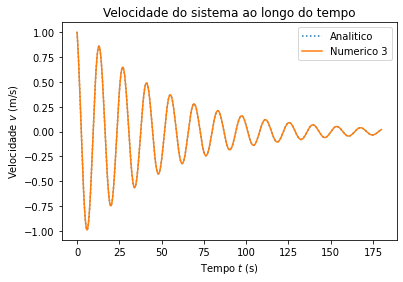

In [27]:
v_num3 = Y_num3[:, 1]
print("Error v_num3 norm L1  = %.3e" % norma_L1(v_num3 - v_ana))
print("Error v_num3 norm L2  = %.3e" % norma_L2(v_num3 - v_ana))
print("Error v_num3 norm inf = %.3e" % norma_inf(v_num3 - v_ana))
plt.plot(t, v_ana, label="Analitico", ls="dotted")
plt.plot(t, v_num3, label="Numerico 3")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Velocidade do sistema ao longo do tempo")

#### Todas soluções numéricas apresentadas

Error x_num1 norm L1  = 1.837e-04
Error x_num1 norm L2  = 6.642e-06
Error x_num1 norm inf = 4.438e-07
Error x_num2 norm L1  = 1.075e-11
Error x_num2 norm L2  = 4.054e-13
Error x_num2 norm inf = 2.741e-14
Error x_num3 norm L1  = 3.896e-01
Error x_num3 norm L2  = 1.544e-02
Error x_num3 norm inf = 1.123e-03


Text(0.5, 1.0, 'Posição do sistema ao longo do tempo')

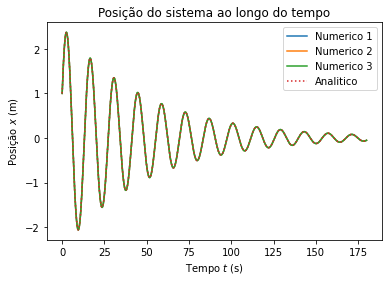

In [28]:
for i, Y in enumerate([Y_num1, Y_num2, Y_num3]):
    x = Y[:, 0]
    print("Error x_num%d norm L1  = %.3e" % (i+1, norma_L1(x - x_ana)))
    print("Error x_num%d norm L2  = %.3e" % (i+1, norma_L2(x - x_ana)))
    print("Error x_num%d norm inf = %.3e" % (i+1, norma_inf(x - x_ana)))
    plt.plot(t, x, label="Numerico %d" % (i+1))
plt.plot(t, x_ana, label="Analitico", ls="dotted")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Posição $x$ (m)")
plt.title("Posição do sistema ao longo do tempo")

Error v_num1 norm L1  = 8.108e-05
Error v_num1 norm L2  = 2.938e-06
Error v_num1 norm inf = 2.029e-07
Error v_num2 norm L1  = 4.872e-12
Error v_num2 norm L2  = 1.831e-13
Error v_num2 norm inf = 1.238e-14
Error v_num3 norm L1  = 9.195e-02
Error v_num3 norm L2  = 3.436e-03
Error v_num3 norm inf = 2.764e-04


Text(0.5, 1.0, 'Velocidade do sistema ao longo do tempo')

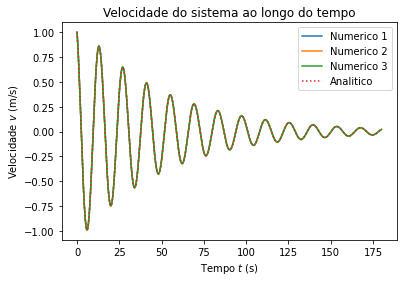

In [29]:
for i, Y in enumerate([Y_num1, Y_num2, Y_num3]):
    v = Y[:, 1]
    print("Error v_num%d norm L1  = %.3e" % (i+1, norma_L1(v - v_ana)))
    print("Error v_num%d norm L2  = %.3e" % (i+1, norma_L2(v - v_ana)))
    print("Error v_num%d norm inf = %.3e" % (i+1, norma_inf(v - v_ana)))
    plt.plot(t, v, label="Numerico %d" % (i+1))
plt.plot(t, v_ana, label="Analitico", ls="dotted")
plt.legend()
plt.xlabel(r"Tempo $t$ (s)")
plt.ylabel(r"Velocidade $v$ (m/s)")
plt.title("Velocidade do sistema ao longo do tempo")

## Variações nos parâmetros iniciais

Nas partes superiores, fizemos apenas para um caso específico de $m$, $c$ e $k$. Aqui iremos variar o valor de $c$ tal que $\xi$ fique no intervalo $\left[0, \ 3\right]$ e mostraremos os erros para os métodos numéricos aqui mostrados.

In [30]:
ximax = 3
xis = np.linspace(0, 1, 129)
xis = np.concatenate((xis, np.linspace(1+1e-6, ximax, 129)))

erros = np.zeros((3, 3, 2, len(xis)))
# 3 pois temos 3 métodos numericos diferentes
# 3 pois temos 3 normas diferentes (L1, L2, inf)
# 2 pois temos (x, v), posicao e velocidade
# e a quantidade de xis, pois para cada xis temos uma simulacao diferente

npts = 1000
t = np.linspace(0, T, npts)
Y_num = np.zeros((3, npts, 2))
for z, xi in enumerate(xis):
    x_anal = solucao_x(xi, wn, x0, v0)(t)
    v_anal = solucao_v(xi, wn, x0, v0)(t)
    Y_anal = np.array([x_anal, v_anal]).T
    c = 2 * xi * np.sqrt(m*k)
    A = np.array([[0, 1],
                  [-k/m, -c/m]])
    dydt = lambda y, t: A @ y
    lams, P = np.linalg.eig(A)
    Pinv = np.linalg.inv(P)
    dt = t[1] - t[0]
    W = getW(m, c, k, dt)
    
    Y_num[0] = odeint(dydt, y0, t)

    for i, ti in enumerate(t):
        Matrix = P @ np.diag(np.exp(ti * lams)) @ Pinv
        Y_num[1, i] = np.real(Matrix) @ y0 
    
    Y_num[2, 0] = y0
    for i in range(1, npts):
        Y_num[2, i] = W @ Y_num[2, i-1]

    for i in range(3):  # Tipo do metodo
        for j, norma in enumerate([norma_L1, norma_L2, norma_inf]):
            for r in range(2):  # Posicao ou velocidade
                erros[i, j, r, z] = norma(Y_num[i, :, r] - Y_anal[:, r])    

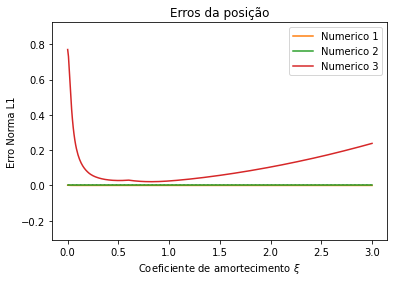

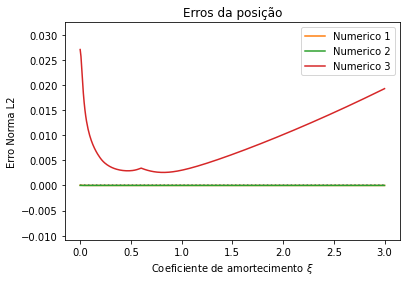

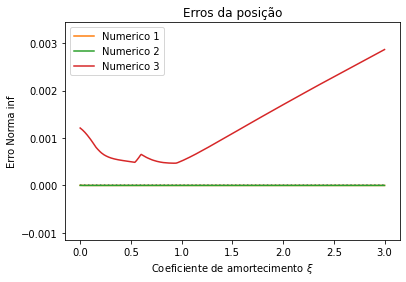

In [31]:
for j in range(3):
    plt.figure()
    plt.plot((0, ximax), (0, 0), ls="dotted")
    for i in range(3):
        plt.plot(xis, erros[i, j, 0, :], label="Numerico %d" % (i+1))
    plt.xlabel(r"Coeficiente de amortecimento $\xi$")
    if j == 0:
        plt.ylabel(r"Erro Norma L1")
    elif j == 1:
        plt.ylabel(r"Erro Norma L2")
    else:
        plt.ylabel(r"Erro Norma inf")
    plt.title("Erros da posição")
    plt.ylim(ymin=-0.4*np.max(erros[2, j, 0, :]))
    plt.ylim(ymax=1.2*np.max(erros[2, j, 0, :]))
    plt.legend()

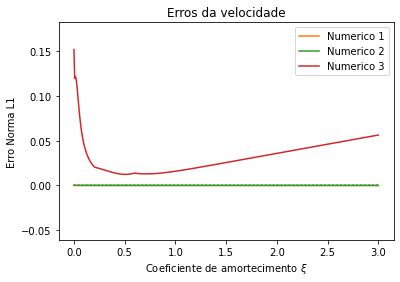

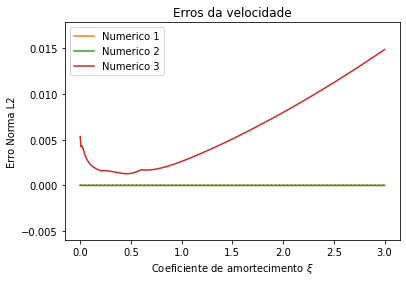

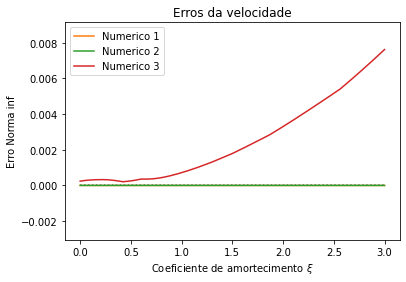

In [32]:
for j in range(3):
    plt.figure()
    plt.plot((0, ximax), (0, 0), ls="dotted")
    for i in range(3):
        plt.plot(xis, erros[i, j, 1, :], label="Numerico %d" % (i+1))
    plt.xlabel(r"Coeficiente de amortecimento $\xi$")
    if j == 0:
        plt.ylabel(r"Erro Norma L1")
    elif j == 1:
        plt.ylabel(r"Erro Norma L2")
    else:
        plt.ylabel(r"Erro Norma inf")
    plt.title("Erros da velocidade")
    plt.ylim(ymin=-0.4*np.max(erros[2, j, 1, :]))
    plt.ylim(ymax=1.2*np.max(erros[2, j, 1, :]))
    plt.legend()

## Disponível online

Esse python notebook está disponível online no GitHub através do link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/sistema-massa-mola](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/sistema-massa-mola.ipynb)